In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [49]:
df = pd.read_csv('SampleSuperstore.csv')


In [50]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [52]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [53]:
df.duplicated().sum()

17

In [54]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [55]:
print(df.describe())

        Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600


In [56]:
df = df.drop(['Postal Code'],axis=1)

In [57]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Where are we making profits/loss in terms of product categories?

In [60]:


category_profits=df.groupby('Category')['Profit'].sum().reset_index()


sorted_category_profits = category_profits.sort_values(by='Profit', ascending=False)

sorted_category_profits

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122364.6608
0,Furniture,18421.8137


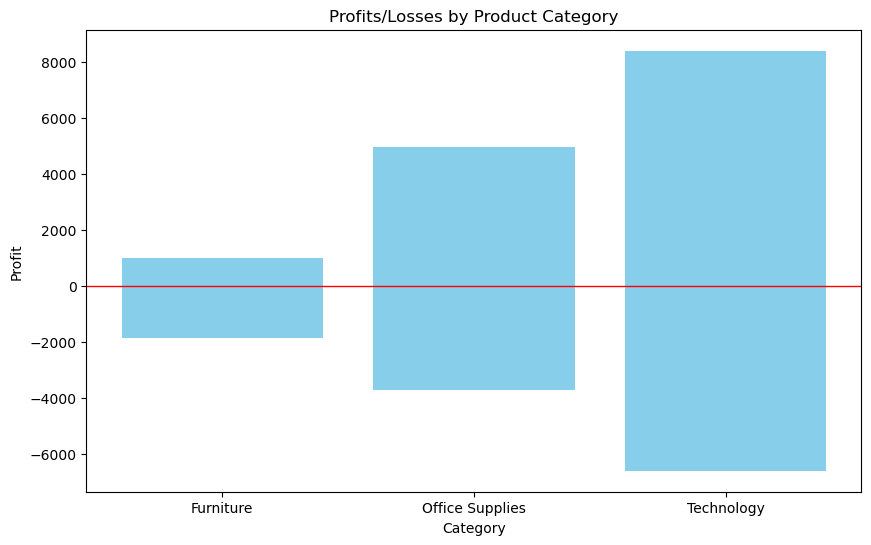

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(df['Category'], df['Profit'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profits/Losses by Product Category')
plt.axhline(0, color='red', linewidth=1)  
plt.show()

# Do we have the most sales in region ?

In [64]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
top_region = sales_by_region.loc[sales_by_region['Sales'].idxmax()]

print(f"The region with the highest sales is {top_region['Region']} with total sales of ${top_region['Sales']:.2f}")

The region with the highest sales is West with total sales of $725255.64


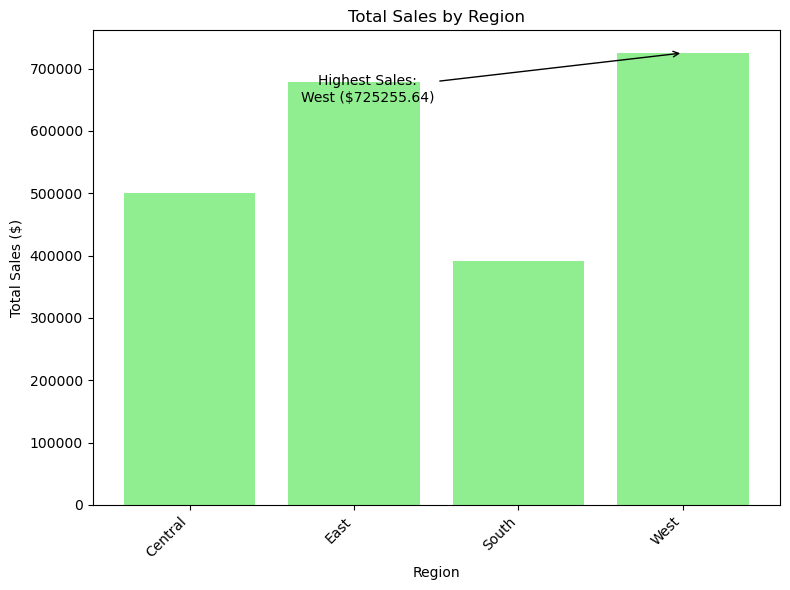

In [70]:
plt.figure(figsize=(8, 6))
plt.bar(sales_by_region['Region'], sales_by_region['Sales'], color='lightgreen')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Region')
plt.xticks(rotation=45, ha='right')

# Adding annotation for the top region
plt.annotate(f"Highest Sales:\n{top_region['Region']} (${top_region['Sales']:.2f})", 
             xy=(top_region['Region'], top_region['Sales']), 
             xytext=(0.4, 0.85), textcoords='axes fraction', 
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# Which type of customer segment brings the most sales? 

In [65]:
segment_sales=df.groupby('Segment')['Sales'].sum().reset_index()
top_segment = segment_sales.loc[segment_sales['Sales'].idxmax()]

print(f"The customer segment with the highest sales is {top_segment['Segment']} with total sales of ${top_segment['Sales']:.2f}")

The customer segment with the highest sales is Consumer with total sales of $1160832.77


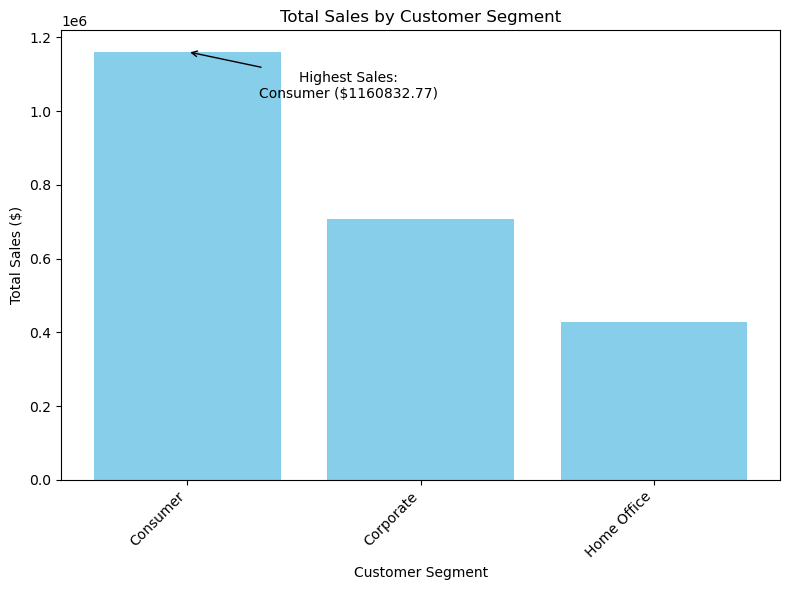

In [68]:
plt.figure(figsize=(8, 6))
plt.bar(segment_sales['Segment'], segment_sales['Sales'], color='skyblue')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45, ha='right')

plt.annotate(f"Highest Sales:\n{top_segment['Segment']} (${top_segment['Sales']:.2f})", 
             xy=(top_segment['Segment'], top_segment['Sales']), 
             xytext=(0.4, 0.85), textcoords='axes fraction', 
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()


# Which Category is Best Selling and Most Profitable?

In [66]:

# Group by category and sum sales and profit
sales_profit_by_category = df.groupby('Category').sum().reset_index()

# Find the category with the highest sales
best_selling_category = sales_profit_by_category.loc[sales_profit_by_category['Sales'].idxmax()]

# Find the category with the highest profit
most_profitable_category = sales_profit_by_category.loc[sales_profit_by_category['Profit'].idxmax()]

print(f"The best-selling category is '{best_selling_category['Category']}' with total sales of ${best_selling_category['Sales']:.2f}")
print(f"The most profitable category is '{most_profitable_category['Category']}' with total profit of ${most_profitable_category['Profit']:.2f}")


The best-selling category is 'Technology' with total sales of $836154.03
The most profitable category is 'Technology' with total profit of $145454.95


([0, 1, 2],
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

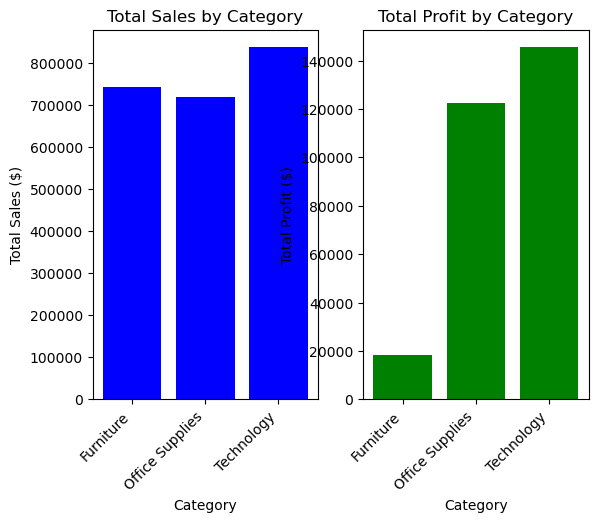

In [67]:
# Plotting Sales
plt.subplot(1, 2, 1)
plt.bar(sales_profit_by_category['Category'], sales_profit_by_category['Sales'], color='blue')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Category')
plt.xticks(rotation=45, ha='right')

# Plotting Profit
plt.subplot(1, 2, 2)
plt.bar(sales_profit_by_category['Category'], sales_profit_by_category['Profit'], color='green')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.title('Total Profit by Category')
plt.xticks(rotation=45, ha='right')

# what is thw most Sales of sub category?

In [71]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Find the sub-category with the highest sales
top_subcategory = subcat_sales.loc[subcat_sales['Sales'].idxmax()]

print(f"The sub-category with the highest sales is '{top_subcategory['Sub-Category']}' with total sales of ${top_subcategory['Sales']:.2f}")

The sub-category with the highest sales is 'Phones' with total sales of $330007.05


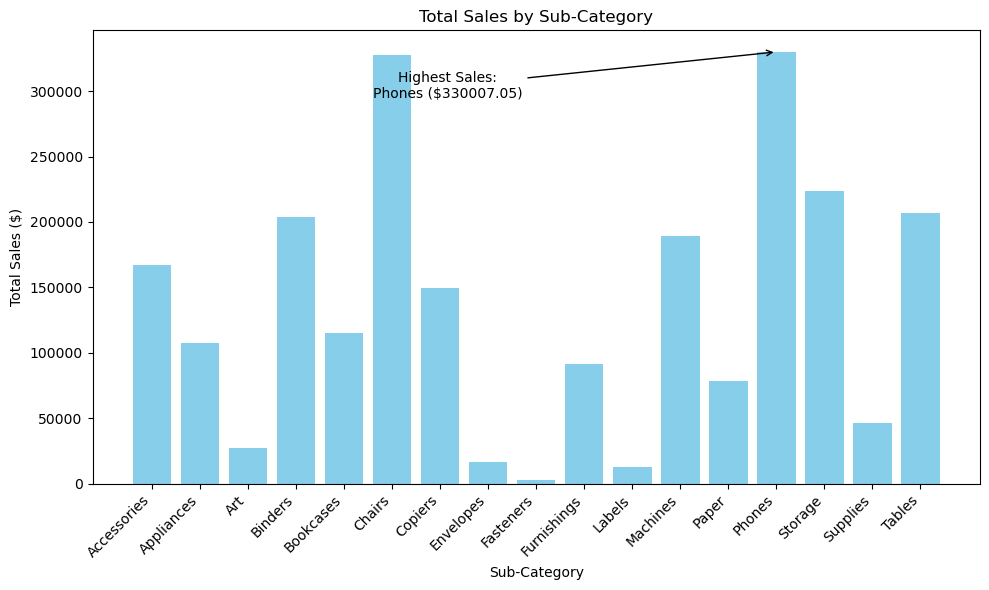

In [72]:
plt.figure(figsize=(10, 6))
plt.bar(subcat_sales['Sub-Category'], subcat_sales['Sales'], color='skyblue')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Sub-Category')
plt.xticks(rotation=45, ha='right')

# Adding annotation for the top sub-category
plt.annotate(f"Highest Sales:\n{top_subcategory['Sub-Category']} (${top_subcategory['Sales']:.2f})", 
             xy=(top_subcategory['Sub-Category'], top_subcategory['Sales']), 
             xytext=(0.4, 0.85), textcoords='axes fraction', 
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# What is the most Ship Mode of sales and sub categories?

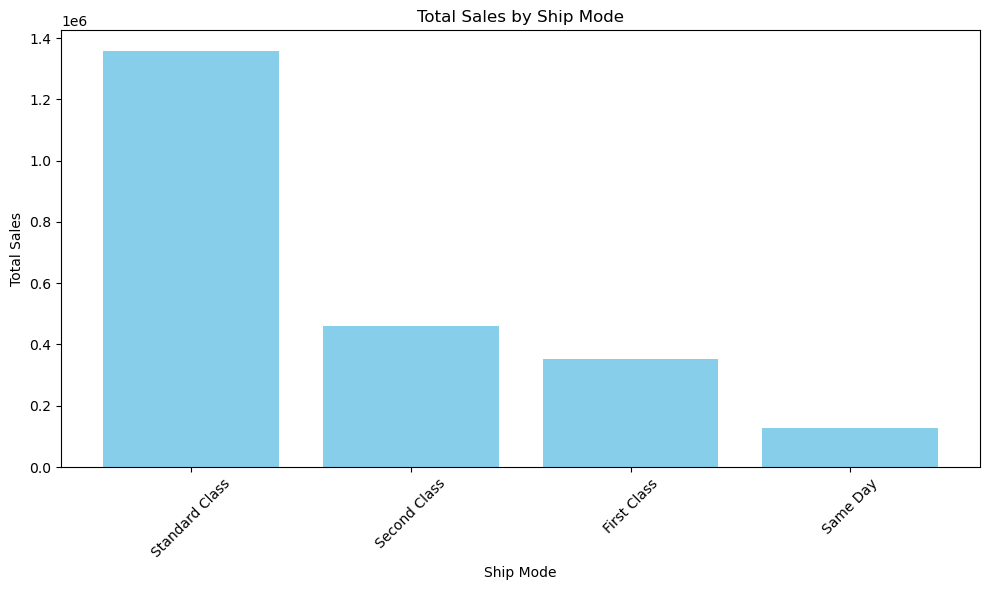

In [74]:
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()


shipmode_sales = shipmode_sales.sort_values(by='Sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(shipmode_sales['Ship Mode'], shipmode_sales['Sales'], color='skyblue')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.title('Total Sales by Ship Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

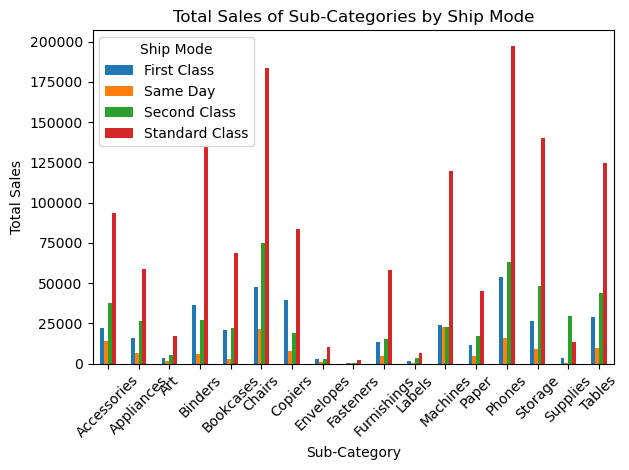

In [75]:
shipmode_subcat_sales = df.groupby(['Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()


pivot_data = shipmode_subcat_sales.pivot(index='Sub-Category', columns='Ship Mode', values='Sales')

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales of Sub-Categories by Ship Mode')
plt.xticks(rotation=45)
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()

# piechart of ship mode and sales

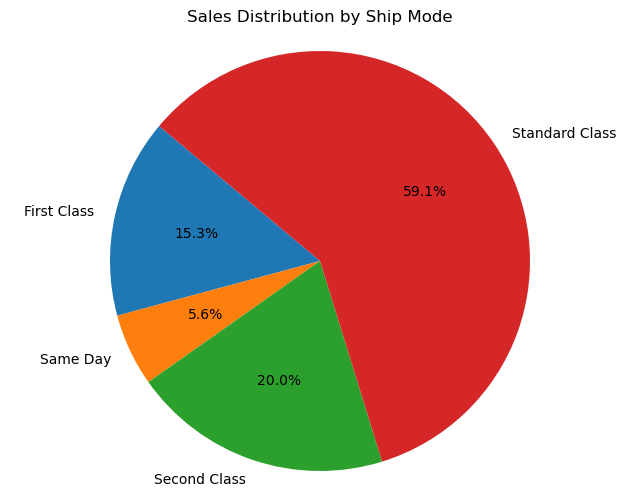

In [78]:
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(shipmode_sales['Sales'], labels=shipmode_sales['Ship Mode'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Ship Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Top 5 cities of sales

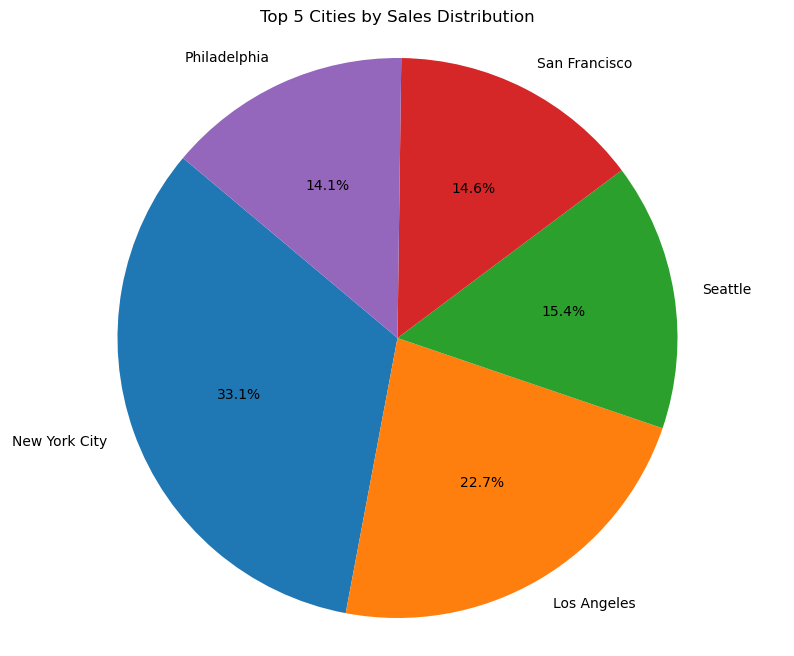

In [84]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()

# Sort by sales in descending order and select top 5 cities
top_cities = city_sales.sort_values(by='Sales', ascending=False).head(5)

# Plotting the pie chart for top 5 cities
plt.figure(figsize=(10, 8))
plt.pie(top_cities['Sales'], labels=top_cities['City'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Cities by Sales Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()